In [ ]:
#import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #thư viện cho vẽ hình

## Data overview

In [ ]:
df=pd.read_csv('bank.csv.xls')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Cleaning data

In [ ]:
# Check specific characters for Object columns
from string import punctuation
object_cols = list(df.select_dtypes(['object']).columns)
specific_characters = list(set(punctuation))
print(f"Specific chacracters: {specific_characters}")

for col in object_cols:
    for specific_character in specific_characters:
        num_specific_character = df[col].str.contains(specific_character, regex=False).sum()
        if num_specific_character > 0:
            print(f'Column [{col}] has {num_specific_character} specific character "{specific_character}"')

Specific chacracters: ['(', ']', '@', '\\', '-', '~', '<', '#', '"', '}', '`', '+', '$', ',', ')', '/', '{', '=', '^', '!', '.', '|', '[', ':', '*', '?', '_', '>', "'", ';', '%', '&']
Column [job] has 2349 specific character "-"
Column [job] has 1334 specific character "."


In [ ]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [ ]:
# Check NA value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Check duplicated data
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


## EDA

In [ ]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

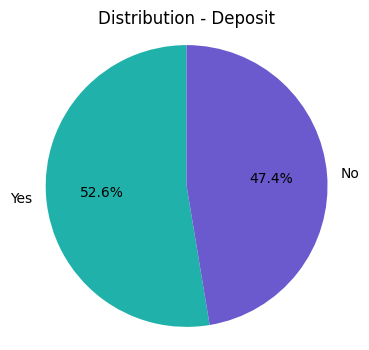

In [ ]:
deposit_counts = df['deposit'].value_counts()
deposit_counts.columns = ['Yes', 'No']
plt.figure(figsize=(4, 4))
pie=plt.pie(deposit_counts, labels=deposit_counts.columns, autopct='%1.1f%%',startangle=90,colors=['LightSeaGreen', 'SlateBlue'])
plt.axis('equal')
plt.title("Distribution - Deposit")
plt.show()


--> The distribution between yes/no classes of the "Deposit" column is relatively equal and not imbalanced

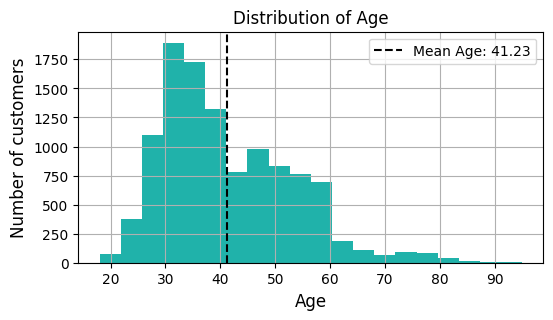

In [ ]:
plt.figure(figsize=(6,3))
df['age'].hist(bins=20, color='LightSeaGreen')
mean_age = df['age'].mean()
plt.axvline(x=mean_age, color='black', linestyle="--", label='Mean Age: {:.2f}'.format(mean_age))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.legend()
plt.title('Distribution of Age')
plt.show()

--> Most customers are between the ages of 25-45.

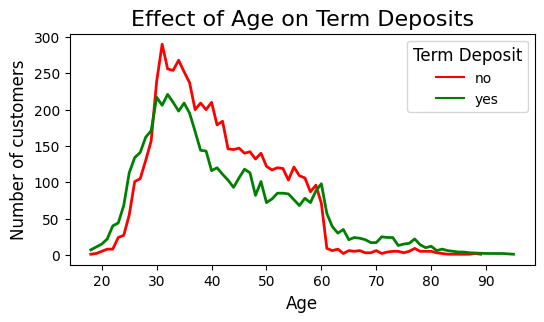

In [ ]:
grouped_df = df.groupby(['age', 'deposit'])['job'].count().reset_index()

plt.figure(figsize=(6,3))
sns.lineplot(data=grouped_df, x='age', y='job', hue='deposit',
             palette=['red','green'], linewidth=2)
plt.title('Effect of Age on Term Deposits', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.legend(title='Term Deposit', title_fontsize=12)
plt.show()

--> Although there are a larger number of customers in the younger age group (20-55), the number of customers agreeing to participate in the term deposit program is less than in the older customer group (60-90).

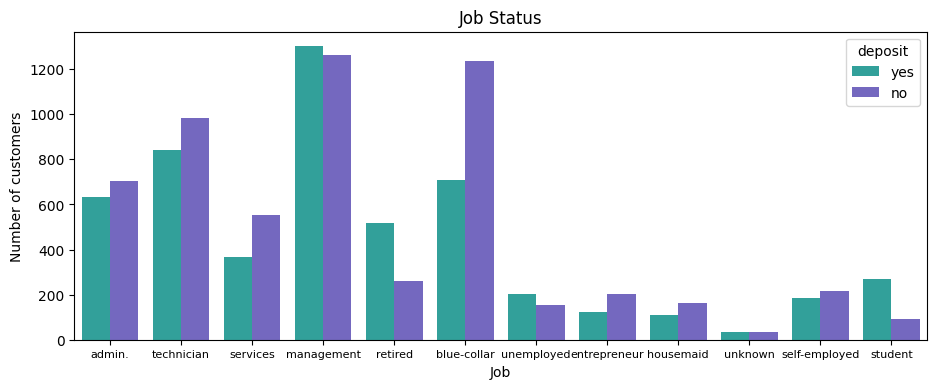

In [ ]:
plt.figure(figsize=(11,4))
sns.countplot(data = df,x= 'job',hue = 'deposit', palette=['LightSeaGreen', 'SlateBlue'])
plt.title('Job Status')
plt.xlabel('Job')
plt.ylabel('Number of customers')
plt.xticks(fontsize=8)
plt.show()

- A large number of customers work in the following fields:admin, technician, management, blue-collar
- Customers in the management/retired/unemployed and students groups are more likely to register for the term deposit program than customers in other industry groups.

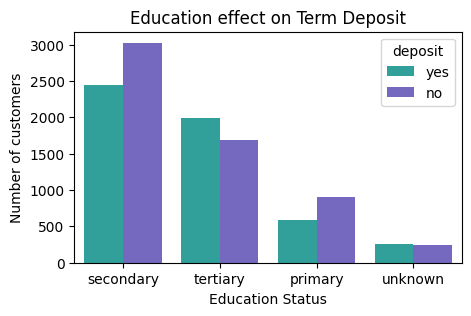

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data = df,x= 'education',hue = 'deposit', palette=['LightSeaGreen', 'SlateBlue'])
plt.title('Education effect on Term Deposit')
plt.xlabel('Education Status')
plt.ylabel('Number of customers')
plt.show()

--> The majority of customers are secondary education, followed by tertiary.

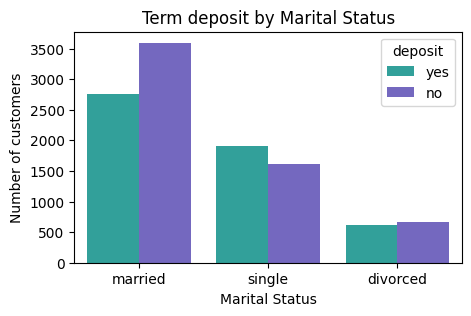

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data = df,x= 'marital',hue = 'deposit', palette=['LightSeaGreen', 'SlateBlue'])
plt.title('Term deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of customers')
plt.show()


--> The majority of customers are married, the number of customers agreeing to register for the program ~ 2700 (48%), while the group of single customers is smaller but the number participating in the program is greater

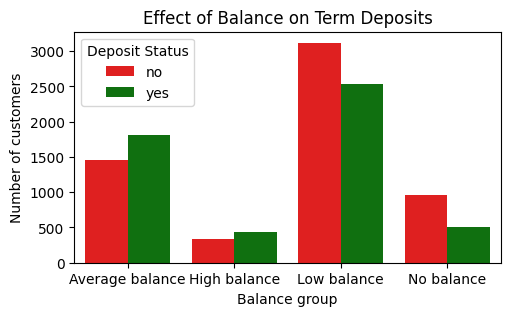

In [ ]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'No balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'Low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 5000), 'balance_group'] = 'Average balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'High balance'
grouped_df = df.groupby(['balance_group', 'deposit'])['age'].count().reset_index().rename(columns={'age': 'Count'})
plt.figure(figsize=(5.5,3))
sns.barplot(data=grouped_df, x='balance_group', y='Count', hue='deposit',
            palette={'red', 'green'})
plt.title('Effect of Balance on Term Deposits', fontsize=12)
plt.xlabel('Balance group', fontsize=10)
plt.ylabel('Number of customers', fontsize=10)
plt.legend(title='Deposit Status', title_fontsize=10)
plt.show()


Groups of customers with average and high balances will participate in the term deposit program more.

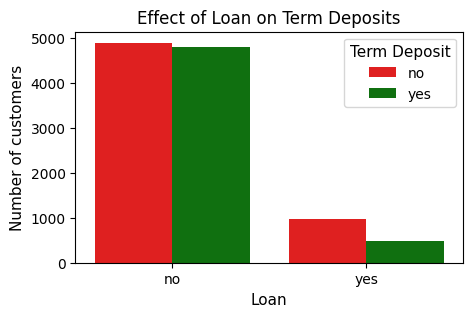

In [ ]:
grouped_df = df.groupby(['loan', 'deposit'])['job'].count().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(data=grouped_df, x='loan', y='job', hue='deposit', palette=['red', 'green'])
plt.title('Effect of Loan on Term Deposits', fontsize=12)
plt.xlabel('Loan', fontsize=11)
plt.ylabel('Number of customers', fontsize=11)
plt.legend(title='Term Deposit', title_fontsize=11)
plt.show()

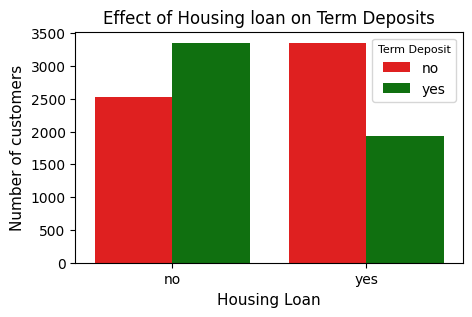

In [ ]:
grouped_df = df.groupby(['housing', 'deposit'])['job'].count().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=grouped_df, x='housing', y='job', hue='deposit', palette=['red', 'green'])
plt.title('Effect of Housing loan on Term Deposits', fontsize=12)
plt.xlabel('Housing Loan', fontsize=11)
plt.ylabel('Number of customers', fontsize=11)
plt.legend(title='Term Deposit', title_fontsize=8)
plt.show()

The group of customers without debt (loan & housing loan) will participate in the program more

The average time to introduce the program to customers is: 372 seconds. For programs introduced above average duration have more customers participated in the program

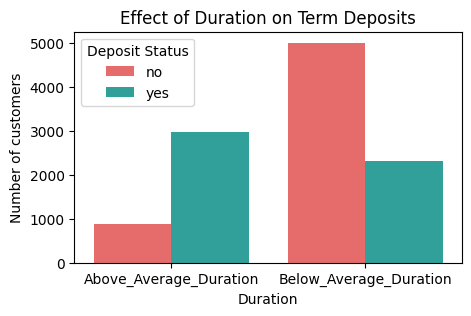

Mean of duration: 372.0 Seconds


In [ ]:
df['Duration_2'] = df['duration'].apply(lambda x: 'Above_Average_Duration' if x >= df['duration'].mean() else 'Below_Average_Duration')
grouped_df = df.groupby(['Duration_2', 'deposit'])['age'].count().reset_index().rename(columns={'age': 'Count'})
plt.figure(figsize=(5,3))
sns.barplot(data=grouped_df, x='Duration_2', y='Count', hue='deposit',
            palette={'#FA5858','LightSeaGreen'})
plt.title('Effect of Duration on Term Deposits', fontsize=12)
plt.xlabel('Duration', fontsize=10)
plt.ylabel('Number of customers', fontsize=10)
plt.legend(title='Deposit Status', title_fontsize=10)
plt.show()
print('Mean of duration:',df['duration'].mean().round(),'Seconds')

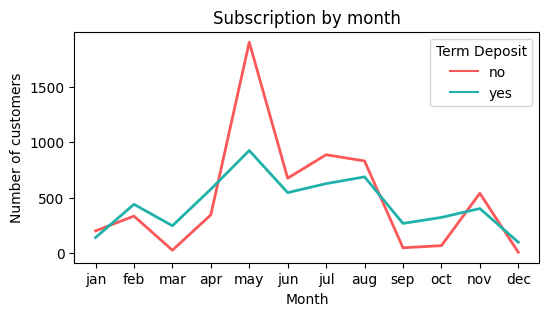

In [ ]:
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_sort, ordered=True)

grouped_df = df.groupby(['month', 'deposit'])['job'].count().reset_index()

plt.figure(figsize=(6,3))
sns.lineplot(data=grouped_df, x='month', y='job', hue='deposit',
             palette=['#FA5858','lightSeaGreen'], linewidth=2)
plt.title('Subscription by month', fontsize=12)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of customers', fontsize=10)
plt.legend(title='Term Deposit', title_fontsize=10)
plt.show()

The bank calls to introduce the program to customers the most from May to August, but May is the month with the largest number of customers refusing to participate in the program. Meanwhile, months 2-3 and 9-10 have a higher number of customers agreeing to participate in the program.

## Encoding

In [ ]:
df.drop(['Duration_2','balance_group'],axis=1, inplace=True)
df['month'] = df['month'].astype('object')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Mã hoá bằng thư viện Label Encoder
object_cols2 = list(df.select_dtypes(['object']).columns)
le = LabelEncoder()
df[object_cols2] = df[object_cols2].apply(le.fit_transform) #Mã hóa dữ liệu cho cả bảng df, có thể lựa chọn từng cột để mã hóa
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
df.month.unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

## Correlation

<Axes: >

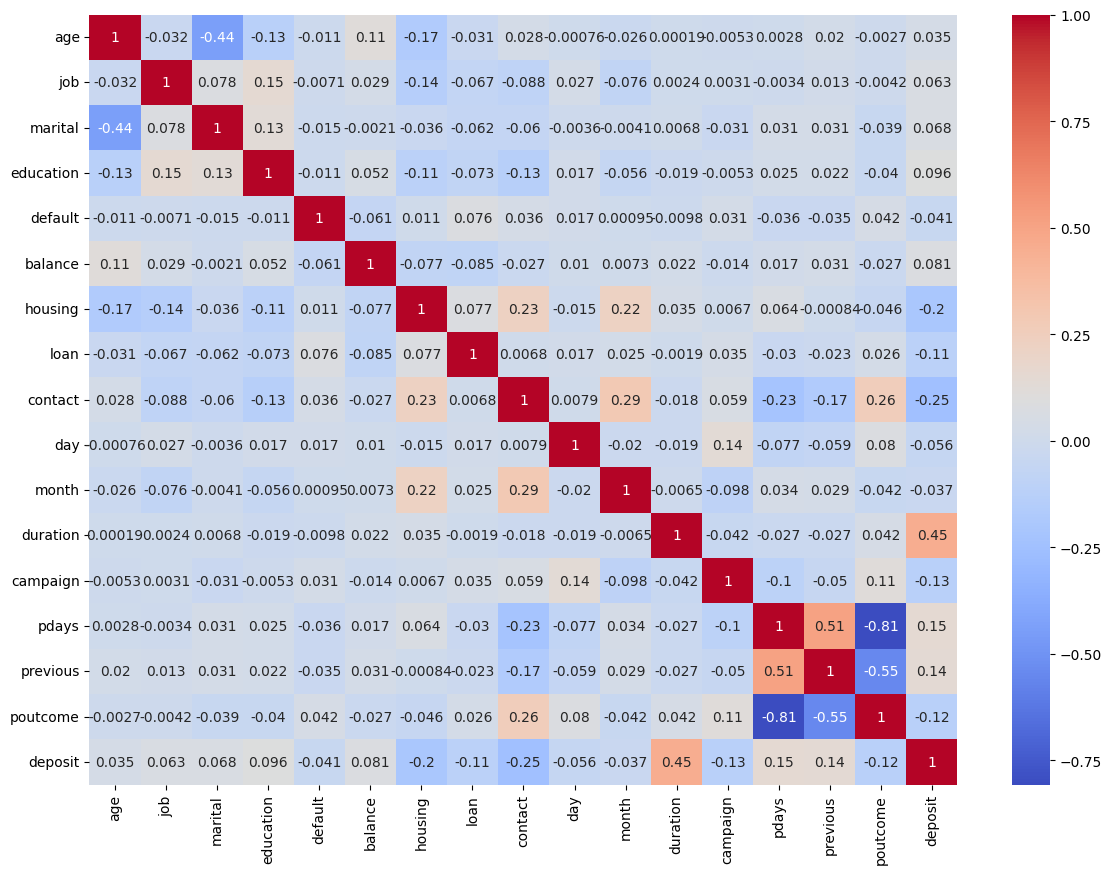

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df_corr=df[['housing','loan','contact','duration','campaign','pdays','poutcome', 'balance']].corr()

<Axes: >

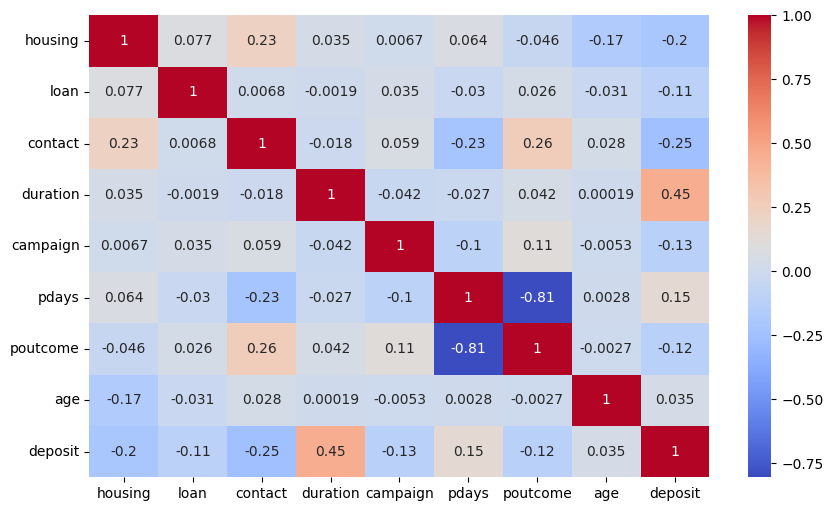

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['housing','loan','contact','duration','campaign','pdays','poutcome','age','deposit']].corr(), annot=True, cmap='coolwarm')

- The average correlation between feature columns and label columns is low.
- The correlation between characteristic columns is also not high

=> Only the pdays and poutcome columns have a correlation of 0.81 but are not too similar.

=> We use all columns to train the model

## Standardise the Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
data_minmax=scaler.fit_transform(df)
df_minmax=pd.DataFrame(data=data_minmax, columns=df.columns)
df_minmax.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0,1.0
1,0.493506,0.000000,0.5,0.333333,0.0,0.078273,0.0,0.0,1.0,0.133333,0.727273,0.377675,0.000000,0.0,0.0,1.0,1.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.0,0.0,1.0,1.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.0,0.0,1.0,1.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.0,0.0,1.0,1.0


We will focus on using F1-score/accuracy due to the importance of no misses and high correct prediction.

## 1. Model with some festures most influence on Term Deposit Suscription




In [ ]:
X1 = df_minmax[['housing','loan','contact','duration','campaign','age','poutcome', 'balance']]
y = df_minmax['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, train_size = 0.7, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=int(7)),
    SVC()
]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
for model in models:
    model.fit(X1_train, y_train)
    y_pred = model.predict(X1_test)
    rp = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(f"""
    model: {model}
      classification report:\n {rp}
      confusion matrix:\n {cf}
    """)


    model: LogisticRegression()
      classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      1792
         1.0       0.76      0.75      0.76      1557

    accuracy                           0.78      3349
   macro avg       0.78      0.77      0.78      3349
weighted avg       0.78      0.78      0.78      3349

      confusion matrix:
 [[1429  363]
 [ 386 1171]]
    

    model: GaussianNB()
      classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71      1792
         1.0       0.67      0.80      0.73      1557

    accuracy                           0.72      3349
   macro avg       0.73      0.73      0.72      3349
weighted avg       0.73      0.72      0.72      3349

      confusion matrix:
 [[1168  624]
 [ 314 1243]]
    

    model: DecisionTreeClassifier()
      classification report:
               precision    recall  f1-score   s

## 2. Model with all features

In [ ]:
X = df_minmax.drop('deposit', axis=1)
y = df_minmax['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

### 2.1 Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=int(7)),
    SVC()
]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rp = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(f"""
    model: {model}
      classification report:\n {rp}
      confusion matrix:\n {cf}
    """)


    model: LogisticRegression()
      classification report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      1792
         1.0       0.78      0.76      0.77      1557

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

      confusion matrix:
 [[1454  338]
 [ 374 1183]]
    

    model: GaussianNB()
      classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      1792
         1.0       0.69      0.78      0.73      1557

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349

      confusion matrix:
 [[1249  543]
 [ 337 1220]]
    

    model: DecisionTreeClassifier()
      classification report:
               precision    recall  f1-score   s

In [ ]:
#Improve model accuracy with grid search
from sklearn.model_selection import GridSearchCV
hps={
    'C': [0.01, 0.1,0.7,1,1.2,1.5],
     'gamma' : [0.001, 0.01,0.1, 0.2, 0.3, 1,1.5],
     'kernel' : ['linear','poly'],
}
grids= GridSearchCV(SVC(),hps)
grids.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.7, 1, 1.2, 1.5],
                         'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 1, 1.5],
                         'kernel': ['linear', 'poly']})

In [ ]:
grids.best_params_
grids.best_estimator_

SVC(C=0.7, gamma=1.5, kernel='poly')

In [ ]:
y_pred=grids.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1792
         1.0       0.79      0.81      0.80      1557

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### 2.2.Bagging technique

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

models = [
    ('LR', LogisticRegression()),
    ('NB', GaussianNB()),
    ]

ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = model.predict(X_test)
rp = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
print(f"""
model: {model}
  classification report:\n {rp}
  confusion matrix:\n {cf}
""")


model: SVC()
  classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1792
         1.0       0.80      0.78      0.79      1557

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

  confusion matrix:
 [[1488  304]
 [ 338 1219]]



### 2.3 Boosting technique

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100),
    LGBMClassifier(n_estimators=100),
]

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rp = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(f"""
    model: {model}
      classification report:\n {rp}
      confusion matrix:\n {cf}
    """)


    model: AdaBoostClassifier(n_estimators=100)
      classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1792
         1.0       0.82      0.81      0.82      1557

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

      confusion matrix:
 [[1513  279]
 [ 290 1267]]
    

    model: GradientBoostingClassifier()
      classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      1792
         1.0       0.82      0.85      0.84      1557

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

      confusion matrix:
 [[1504  288]
 [ 227 1330]]
    

    model: XGBClassifier(base_score=None, booster=None, callbacks=None,
         

# Comments

1. The model has higher accuracy when run with all features (instead of just selecting a few features that have more influence on the target column, deposit)
2. The model has the highest accuracy when using Randomforest: 85% and the model also predicts well for classification classes (over 80%), recall index 82-86%
3. Testing the model with bagging and boosting techniques, the Boosting technique with LGBMClassifier() has an accuracy index of 85% but only the recall index is increased to 84-87%.